# <center> REGRESIÓN LINEAL

Supongamos que observamos la respuesta (cuantitativa) $Y$ y $p$ predictores
$ X_1, X_2, ..., X_p$. Suponemos también que hay una relación entre Y y **X**
tal que se pueden escribir como 

$$
Y = f(x) + \epsilon 
$$

$f$ es fija pero es desconocida y es una función de las variables $X_1, X_2, ..., X_p$.
$\epsilon$ es un error aleatorio, es independiente de **X** y tiene media cero.
En esta formulación, $f$ representa la información sistemática (la que podemos
aislar con un modelo) que X provee acerca de Y.


In [5]:
#Importamos librerias 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

Podemos ver que en el siguiente ejemplo para 30 individuos en una muestra aleatoria, donde la gráfica de la escolaridad de una persona parece estar muy relacionada con su ingreso.

In [14]:
#Graficamos para evaluar la relación entre variables
import matplotlib.pyplot as plt

In [15]:
#Importamos el conjunto de datos
caso=pd.read_csv("https://raw.githubusercontent.com/VictorGuevaraP/ME-Machine-Learning/master/ingresos.csv", sep=";")
caso.head()

,educacion,ingreso
0,10.000000,26.658839
1,10.401338,27.306435
2,10.842809,22.132410
3,11.244147,21.169841
4,11.645485,15.192634


In [19]:
caso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
educacion    30 non-null float64
ingreso      30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


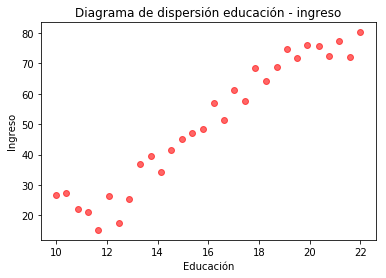

In [17]:
#Graficamos para evaluar la relación entre variables
plt.scatter(caso['educacion'], caso['ingreso'], color='red',alpha=0.6);
plt.title("Diagrama de dispersión educación - ingreso")
plt.ylabel("Ingreso")
plt.xlabel("Educación");


Podemos modelar la relación que existe entre el ingreso y la educación 
de manera que, a partir de conocer la educación de alguien nuevo, podamos
predecir su ingreso. $f$ dependerá de qué tipo de asociación *suponemos*
existe entre las variables independientes y la variable dependiente.

El *aprendizaje estadístico* refiere al conjunto de métodos que tenemos a nuestra
disposición para estimar $f$.

Llamaremos a las variables independientes de muchas maneras: features (caracteristicas), predictores.
A la variable dependiente también la llamaremos variable de respuesta.

# El objetivo (del analista) para determinar f

Hay dos razones principales para querer estimar $f$: para predecir o para
realizar inferencias.

## Predicción

En muchas situaciones, tenemos muchas variables independientes posibles pero
la variable dependiente no es fácilmente obtenible. De la formulación realizada
antes, sabemos que el error promedio es cero y, por ende, podemos
predecir Y usando

<center> $\hat{Y} = \hat{f}(\boldsymbol{X})$

donde $\hat{f}$ representa nuestra estimación para $f$ y $\hat{Y}$ representa
el resultado de nuestra predicción para $Y$.

# <center> Regresión lineal simple

Una regresión lineal simple predice una variable respuesta $Y$ utilizando una
única variable independiente $X$. El supuesto implícito es que la relación
que guardan $X$ y $Y$ es aproximadamente lineal y el modelo que se supone (la
forma de la $f$) es:

$$
Y \approx \beta_0 + \beta_1 X
$$

Si consideramos la base de datos de `ingresos`, podemos especificar un
modelo de regresión lineal simple como sigue:

$$
Ingreso \approx \beta_0 + \beta_1 educación
$$

donde $\beta_0$ representa la ordenada al origen y $\beta_1$ es la pendiente 
del modelo lineal.

Estos dos valores se conocen como *coeficientes* o *parámetros*.

Utilizamos el conjunto de datos `ingresos` para entrenar un modelo, es decir,
para calcular $\hat{\beta_0}$ y $\hat{\beta_1}$ del modelo especificado.
Una vez que calculamos estos dos parámetros podremos calcular una predicción de
$Y$, a la que denotamos como $\hat{y}$ basandonos en que $X = x$.

## Estimación de los coeficientes

Como $\beta_0$ y $\beta_1$ son desconocidos y debemos estimarlos. Para eso utilizamos
las $n$ parejas ordenadas que nos dan nuestros datos, es decir:

$$
(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)
$$

En el ejemplo de `ingresos`, queremos unos estimadores de $\hat{\beta_0}$ y 
$\hat{\beta_1}$ tales que la línea resultante sea la más cercana posible a las
$n$ (30) observaciones en la base.

La más común es el criterio de mínimos cuadrados. Lo que se hace es minimizar la distancia entre los puntos y la recta
al cuadrado, es decir, si vemos la figura siguiente, el error en la observación i-ésima está dado por la línea gris para cada observación $(x_i, y_i)$.
Ésta última son los puntos rojos (en este caso, 30).

Una vez estimados los coeficientes, tenemos $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} x_i$.

$\hat{y_i}$ esta sobre la recta azul.


In [41]:
#Creando nuestra función
def coeficiente_estimados(x, y): 
     
    # media para x y para y
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculamos las dexviaciones cruzadas
    SS_xy = sum((X-m_x)*(Y-m_y))
    SS_xx = sum((X-m_x)**2) 
  
    # Calculando los coeficientes de correlación 
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return(b_0, b_1)


In [54]:
X=caso['educacion']
Y=caso['ingreso']
b_0, b_1=coeficiente_estimados(X,Y)
b_0, b_1

(-39.44625559551918, 5.599482808053283)

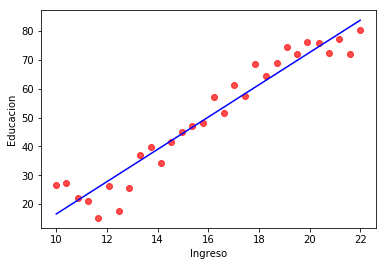

In [53]:
#Graficamos con el modelo de regresión
plt.scatter(X, Y, color = "Red", marker = "o", alpha=0.7) 
y_pred = b_0 + b_1*X 
plt.plot(X, y_pred, color = "Blue") ;
plt.xlabel('Ingreso') 
plt.ylabel('Educacion') 
plt.show()

Se define la suma de cuadrados del error (SCE) como:

$$
SCE = e_1^2 + e_2^2 + ... + e_n^2
$$

La estimación por mínimos cuadrados elige $\hat{\beta_0}$ y 
$\hat{\beta_1}$ que minimizan la $SCE$. Puede probarse que estos son:

$$
\hat{\beta_1} = \frac{\sum_{1=1}^n(x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^{n}(x_i - \overline{x})^2}
$$
$$
\hat{\beta_0} = \overline{y} - \hat{\beta_1}\overline{x}
$$

donde $\overline{y} \equiv \frac{1}{n} \sum_{i=1}^n y_i$ y
$\overline{x} \equiv \frac{1}{n} \sum_{i=1}^n x_i$ son las medias muestrales.

La recta azul de la figura anterior es la recta de la regresión lineal simple 
estimada por mínimos cuadrados. En este caso, la ordenada es $\hat{\beta_0} =$
`-39.45` y la pendiente es $\hat{\beta_1} =$
`5.599`.


## Evaluación de la precisión de los estimadores de los coeficientes

Recordamos que siempre partimos del modelo:

$$
Y = f(X) + \epsilon
$$

En regresión lineal simple, *suponemos* que podemos aproximar $f$ a través de una
función lineal y, por lo tanto, escribimos la relación 

$$
Y = f(X) + \epsilon = \beta_0 + \beta_1 X + \epsilon
$$

Igual que en cualquier otra recta, la ordenada es el valor de la función cuando
$X=0$ y la pendiente es el cambio esperado en $Y$ que podemos asociarle a una
unidad adicional de $X$. La $\epsilon$ simplemente toma todo lo que no pudimos
modelar utilizando la información de $X$. 

El término del error, entonces, contiene:

i. Si la relación no era lineal, lo que no atrapamos por nuestro supuesto sobre $f$

ii. Si la especificación de $X$ no fue completa, atrapa la relación que otras 
variables independientes tienen sobre $Y$.


iii. Errores de medición 


### La prueba de hipótesis de los coeficientes.
La prueba de hipótesis de los coeficientes utilizan los errores estándar. La
prueba más común es aquella en la que la hipótesis nula ($H_0$) es que no hay relación
entre $X$ y $Y$. La alternativa es que existe una relación entre $X$ y $Y$. 

Matemáticamente, esto es:

$$
H_0: \beta_1=0, H_a: \beta_1 \neq 0
$$

Si $\beta_1 = 0$ el modelo se reduce a $Y=\beta_0 + \epsilon$

Para probar la hipótesis nula, se debe determinar si nuestro estimador para 
$\beta_1$ es *suficientemente distinto de cero* de manera que podemos decir,
con cierto nivel de confianza, que este es no-cero.

El *suficientemente distinto* depende del error estándar del coeficiente ($SE(\hat{\beta_1})$)
mientras mayor sea el error estándar del coeficiente, más lejos de cero debe
estar el coeficiente. Mientras más chico sea el error estándar, más pequeño 
puede ser el estimador del coeficiente para que sigamos diciendo que es distinto
de cero.

Se computa el estadístico $t$:

$$
t = \frac{\hat{\beta_1} - 0}{SE(\hat{\beta_1})}
$$

que mide escencialmente a cuántas desviaciones estándar se encuentra $\hat{\beta_1}$
de cero. Si realmente no hay relación entre $X$ y $Y$, esperamos que el 
estadístico $t$ dado por la fórmula anterior se distribuya como una t de student
con $n-2$ grados de libertad.

Se puede calcular la probabilidad de observar $|t|$ (o algo más grande). A 
esta probabilidad se le llama $p-valor$. Mientras menor sea el p-valor, 
menos probable es que la relación observada entre $X$ y $Y$ sea aleatoria.

Mientras menor el p-valor, con más certeza rechazamos la hipótesis nula y 
declaramos que existe una relación entre $X$ y $Y$.

In [55]:
#Importamos la libreria para realizar regresión
from statsmodels.formula.api import ols
model_1 = ols("ingreso ~ educacion", caso).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                ingreso   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     377.6
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           8.63e-18
Time:                        05:50:43   Log-Likelihood:                -93.500
No. Observations:                  30   AIC:                             191.0
Df Residuals:                      28   BIC:                             193.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.4463      4.725     -8.349      0.0

## Evaluación de la precisión del modelo

Ya que rechazamos la hipótesis nula del coeficiente asociado a la $X$ en un 
modelo de regresión simple, queremos saber el grado en el que nuestro modelo
se ajusta a los datos. La calidad del modelo normalmente se evalúa utilizando
el error estándar de los residuales (SCR) y el estadístico $R^2$.

### Error estándar de los residuales

Cada observación tiene asociado un $\epsilon$ pues no podemos predecir en forma
perfecta $Y$ a partir de $X$. La $SCR$ es un estimador de la desviación estándar
de $\epsilon$. Es la cantidad promedio en la que la respuesta $\hat{y}$ se 
desvía de la línea de regresión de la población (la *verdadera*). Se 
computa a través de la fórmula:

$$
SCR = \sqrt{\frac{1}{n-2}SCE} = \sqrt{\frac{1}{n-2}\sum_{i=1}^n(y_i - \hat{y_i})^2}
$$

La SCR es una medida de la falta de ajuste de los datos al modelo. Si las predicciones
que obtenemos con el modelo están muy cerca de los valores verdaderos de la variable
$\hat{y_i} \approx y_i$ para $i=1,...n$ entonces la SCR será pequeña y podemos
concluir que el modelo ajusta bien a los datos.

### $R^2$

La SCR está en las unidades que tiene $Y$ y, por eso, es más dificil determinar
si se tiene un buen SCR. El estadístico $R^2$ es la proporción de varianza 
explicada por el modelo y, por ende, siempre está entre cero y uno (es independiente
de la escala de $Y$).


$$
R^2 = \frac{SCT-SCR}{SCR}=1-\frac{SCR}{SCT}
$$

donde $SCT = \sum(y_i - \overline{y})^2$ es la suma de cuadrados totales y mide
la varianza total de la respuesta $Y$. Se puede ver como la variabilidad inherente
de la variable de respuesta antes de realizar el modelo de regresión. Por esto
$SCT-SCR$ mide la variabilidad explicada al realizar la regresión. $R^2$ mide
la proporción de la variabilidad de $Y$ que se explica al utilizar $X$. 

Aún así, es difícil determinar cuándo la $R^2$ es buena y en general depende de
la aplicación.

La $R^2$ mide la relación lineal entre $X$ y $Y$ y, en regresión lineal simple,
es equivalente a la correlación al cuadrado.

$$
cor(X,Y) = \frac{\sum_{i=1}^n (x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\sum_{i=1}^n (x_i-\overline{x})^2}\sqrt{\sum_{i=1}^n (y_i-\overline{y})^2}}
$$

El concepto de correlación no se extiende en la regresión múltiple de la misma 
manera pues la $R^2$ permitirá medir la correlación entre $Y$ y todas las $X$s
consideradas en el modelo en forma simultánea.


In [57]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                ingreso   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     377.6
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           8.63e-18
Time:                        06:08:54   Log-Likelihood:                -93.500
No. Observations:                  30   AIC:                             191.0
Df Residuals:                      28   BIC:                             193.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.4463      4.725     -8.349      0.0